In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:

data = pd.read_csv('Company%28FRA%29.csv')

In [3]:
data.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

In [5]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Num,4256.00000,2128.50000,1228.74570,1.00000,1064.75000,2128.50000,3192.25000,4256.00000
Networth Next Year,4256.00000,1344.74088,15936.74317,-74265.60000,3.97500,72.10000,330.82500,805773.40000
Total assets,4256.00000,3573.61715,30074.44344,0.10000,91.30000,315.50000,1120.80000,1176509.20000
Net worth,4256.00000,1351.94960,12961.31165,0.00000,31.47500,104.80000,389.85000,613151.60000
Total income,4025.00000,4688.18979,53918.94661,0.00000,107.10000,455.10000,1485.00000,2442828.20000
Change in stock,3706.00000,43.70248,436.91505,-3029.40000,-1.80000,1.60000,18.40000,14185.50000
Total expenses,4091.00000,4356.30110,51398.08712,-0.10000,96.80000,426.80000,1395.70000,2366035.30000
Profit after tax,4102.00000,295.05059,3079.90207,-3908.30000,0.50000,9.00000,53.30000,119439.10000
PBDITA,4102.00000,605.94064,5646.23063,-440.70000,6.92500,36.90000,158.70000,208576.50000
PBT,4102.00000,410.25904,4217.41531,-3894.80000,0.80000,12.60000,74.17500,145292.60000


In [6]:
print('The number of rows (observations) is',data.shape[0],'\n''The number of columns (variables) is',data.shape[1])

The number of rows (observations) is 4256 
The number of columns (variables) is 51


In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Num                                               0
Networth Next Year                                0
Total assets                                      0
Net worth                                         0
Total income                                    231
Change in stock                                 550
Total expenses                                  165
Profit after tax                                154
PBDITA                                          154
PBT                                             154
Cash profit                                     154
PBDITA as % of total income                      79
PBT as % of total income                         79
PAT as % of total income                         79
Cash profit as % of total income                 79
PAT as % of net worth                             0
Sales                                           305
Income from fincial services                   1111
Other income                                   1556
Total capita

In [9]:
# Handle missing values by filling with the mean for simplicity
#data.fillna(data.mean(), inplace=True)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(data)

# Convert the result back to a DataFrame
data= pd.DataFrame(imputed_data, columns=data.columns)

In [10]:
# Recalculate percentage-dependent columns
data['PBDITA as % of total income'] = data['PBDITA'] / data['Total income'] * 100
data['PBT as % of total income'] = data['PBT'] / data['Total income'] * 100
data['PAT as % of total income'] = data['Profit after tax'] / data['Total income'] * 100
data['Cash profit as % of total income'] = data['Cash profit'] / data['Total income'] * 100
data['PAT as % of net worth'] = data['Profit after tax'] / data['Net worth'] * 100
data['Contingent liabilities / Net worth (%)'] = data['Contingent liabilities'] / data['Net worth'] * 100

data['TOL/TNW'] = data['Total liabilities'] / data['Net worth']
data['Total term liabilities / tangible net worth'] = data['Total liabilities'] / data['Net worth']
data['Quick ratio (times)'] = data['Current assets'] / data['Current liabilities & provisions']
data['Current ratio (times)'] = data['Current assets'] / data['Current liabilities & provisions']
data['Debt to equity ratio (times)'] = data['Total liabilities'] / data['Shareholders funds']
data['Cash to current liabilities (times)'] = data['Total assets'] / data['Current liabilities & provisions']
data['Cash to average cost of sales per day'] = data['Total assets'] / (data['Total expenses'] / 365)
data['Creditors turnover'] = data['Total expenses'] / data['Current liabilities & provisions']
data['Debtors turnover'] = data['Total income'] / data['Current assets']
data['Finished goods turnover'] = data['Sales'] / data['Current assets']
data['WIP turnover'] = data['Total expenses'] / data['Current assets']
data['Raw material turnover'] = data['Total expenses'] / data['Current assets']

In [11]:
# Verify the recalculated column
data[['PBDITA as % of total income', 'PBT as % of total income', 'PAT as % of total income', 'Cash profit as % of total income', 
            'PAT as % of net worth', 'Contingent liabilities / Net worth (%)', 'TOL/TNW', 'Total term liabilities / tangible net worth',
            'Quick ratio (times)', 'Current ratio (times)', 'Debt to equity ratio (times)', 'Cash to current liabilities (times)',
            'Cash to average cost of sales per day', 'Creditors turnover', 'Debtors turnover', 'Finished goods turnover', 
            'WIP turnover', 'Raw material turnover']].head()

,PBDITA as % of total income,PBT as % of total income,PAT as % of total income,Cash profit as % of total income,PAT as % of net worth,Contingent liabilities / Net worth (%),TOL/TNW,Total term liabilities / tangible net worth,Quick ratio (times),Current ratio (times),Debt to equity ratio (times),Cash to current liabilities (times),Cash to average cost of sales per day,Creditors turnover,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover
0,23.29152,12.09511,7.28328,17.82438,11.56018,186.21100,2.45944,2.45944,5.86788,5.86788,2.45944,18.85194,593.81561,11.58770,2.07337,2.07104,1.97477,1.97477
1,3.98840,0.72516,2.32052,2.75562,13.16872,47.73663,2.78601,2.78601,1.64557,1.64557,2.78601,2.85654,188.62977,5.52743,3.53590,3.47436,3.35897,3.35897
2,7.78986,3.17029,1.17754,2.83816,4.94297,30.41825,3.02155,3.02155,1.54892,1.54892,3.02155,2.33268,281.42303,3.02544,2.09223,2.08844,1.95325,1.95325
3,4.95236,2.19092,2.11043,2.10688,12.35363,10.78778,4.76928,4.76928,2.48091,2.48091,4.76928,2.59676,296.19889,3.19994,1.28467,1.28402,1.28982,1.28982
4,1.85280,-0.15440,-0.18013,1.00360,-1.48936,17.82979,1.93404,1.93404,2.82270,2.82270,1.93404,6.44681,84.48816,27.85106,9.76382,9.73869,9.86683,9.86683


In [12]:
data.isnull().sum()

Num                                            0
Networth Next Year                             0
Total assets                                   0
Net worth                                      0
Total income                                   0
Change in stock                                0
Total expenses                                 0
Profit after tax                               0
PBDITA                                         0
PBT                                            0
Cash profit                                    0
PBDITA as % of total income                    2
PBT as % of total income                       2
PAT as % of total income                       2
Cash profit as % of total income               2
PAT as % of net worth                          0
Sales                                          0
Income from fincial services                   0
Other income                                   0
Total capital                                  0
Reserves and funds  

In [13]:
# Replace infinite values with NaN, then fill NaN values with zero
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)

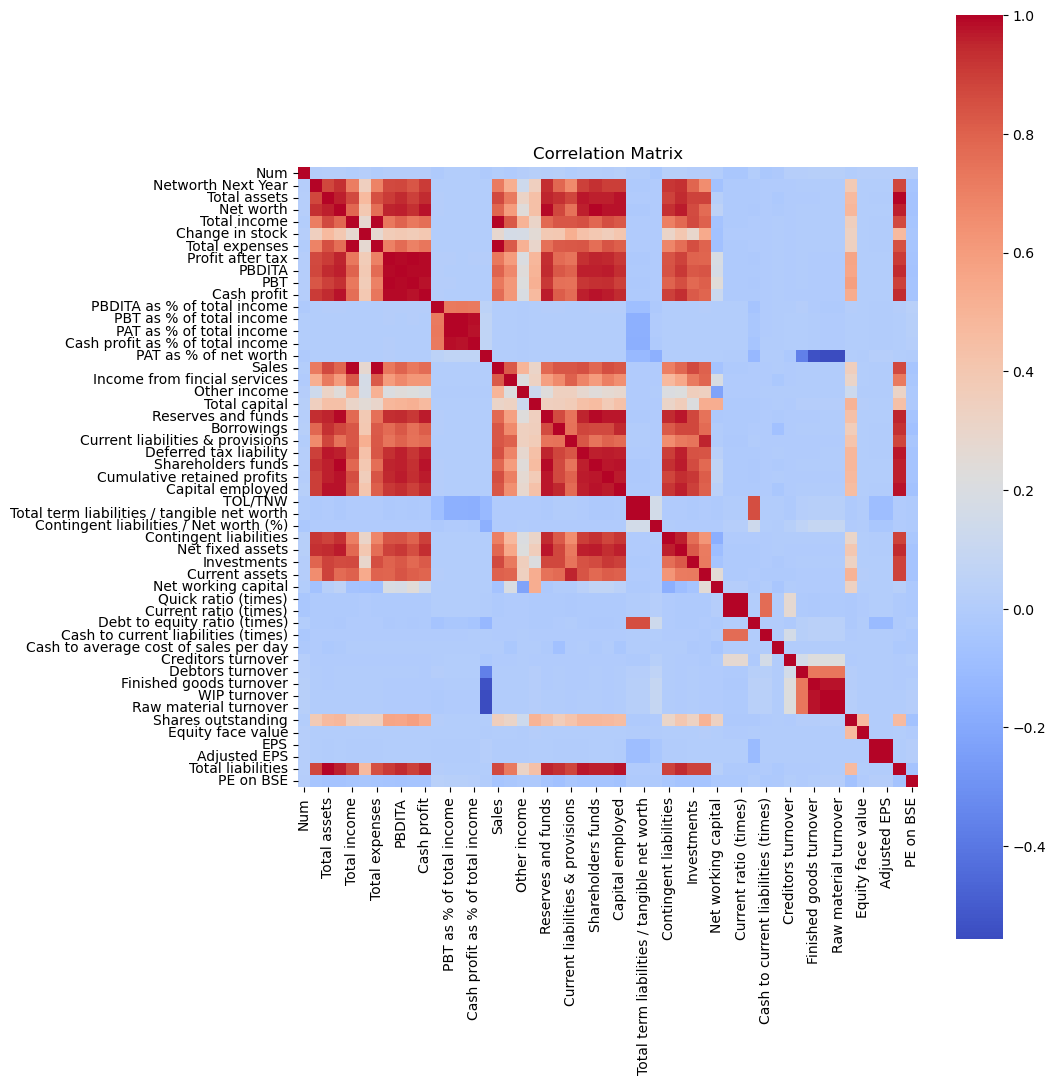

In [14]:
#calculate column correlations and make a seaborn heatmap - Before standardisation

plt.figure(figsize=(10,12))
plt.title("Correlation Matrix")
p=sns.heatmap(data.corr(),cmap='coolwarm',square=True, fmt='.1g')
plt.savefig('heatmap_dfx_55vars.jpg', bbox_inches='tight');

In [15]:
X = data.drop(columns=['Networth Next Year','Num'])

y = data['Networth Next Year'].apply(lambda x: 1 if x < 0 else 0)  # 1 for defaulter, 0 for non-defaulter

<Axes: title={'center': 'Before removing Outliers'}>

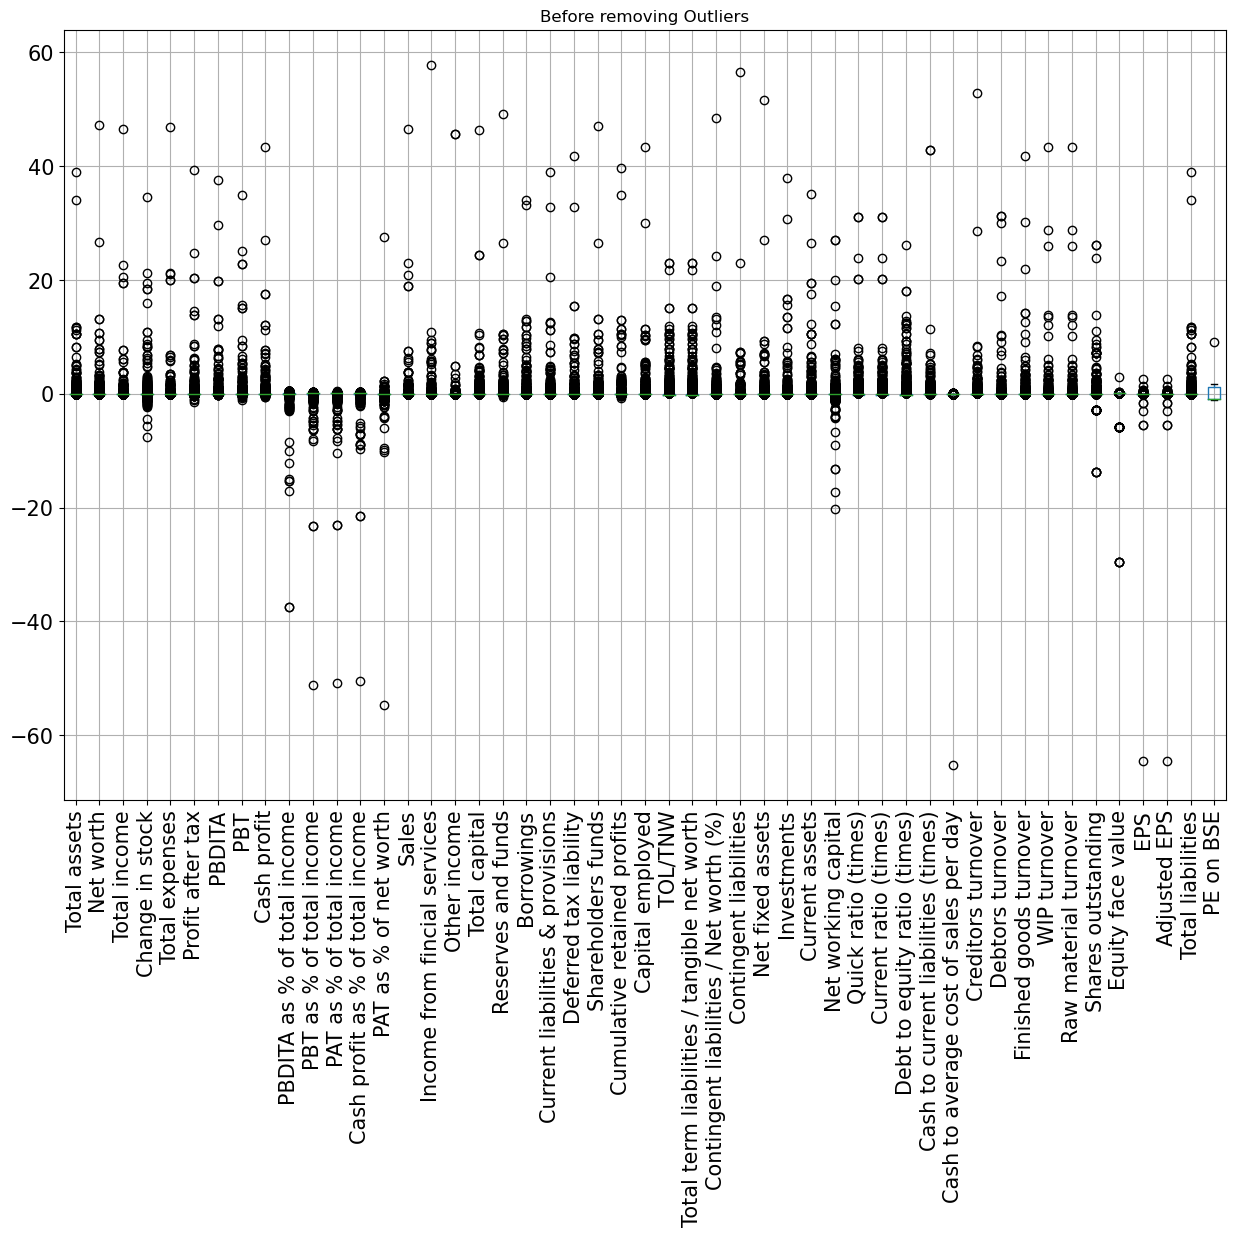

In [16]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert the result back to a DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)


# Create the boxplot
plt.figure(figsize=(15, 10))
plt.title("Before removing Outliers")
df_scaled.boxplot(rot=90, fontsize=15)

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
for column in X.columns:
    lr,ur=remove_outlier(X[column])
    X[column]=np.where(X[column]>ur,ur,X[column])
    X[column]=np.where(X[column]<lr,lr,X[column])

Total assets
Skew : 1.18


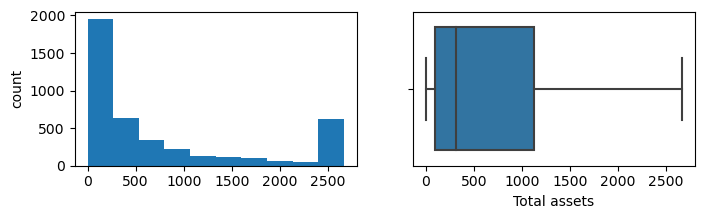

Net worth
Skew : 1.2


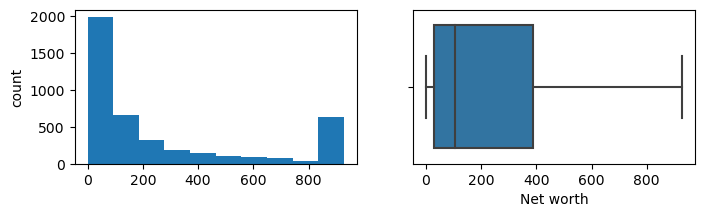

Total income
Skew : 1.2


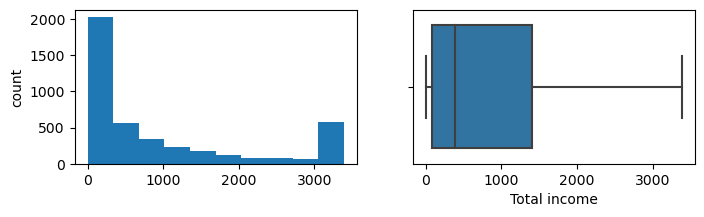

Change in stock
Skew : 0.47


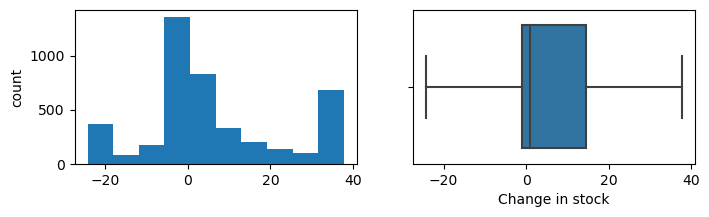

Total expenses
Skew : 1.19


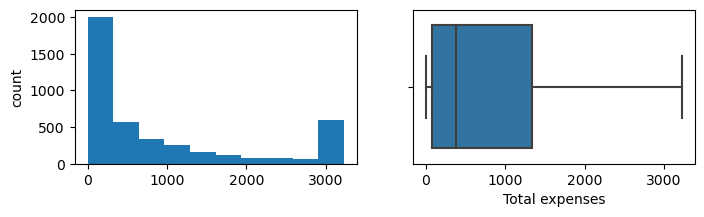

Profit after tax
Skew : 0.88


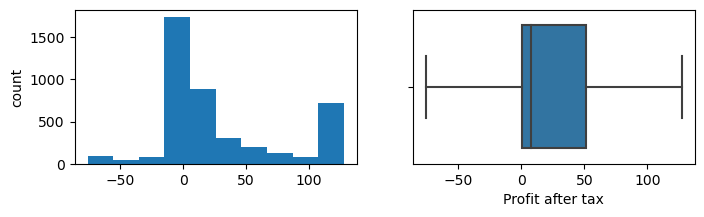

PBDITA
Skew : 1.15


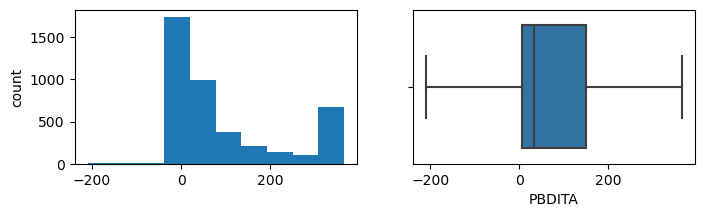

PBT
Skew : 0.92


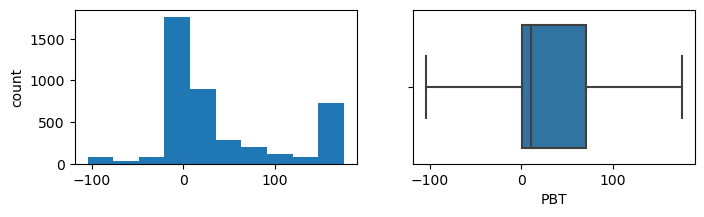

Cash profit
Skew : 1.01


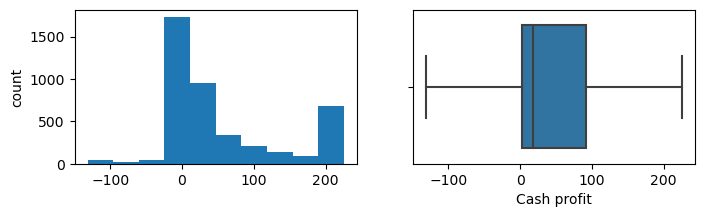

PBDITA as % of total income
Skew : 0.35


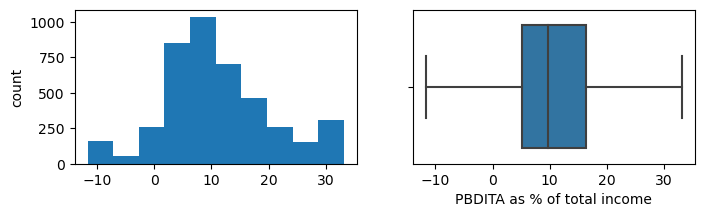

PBT as % of total income
Skew : 0.17


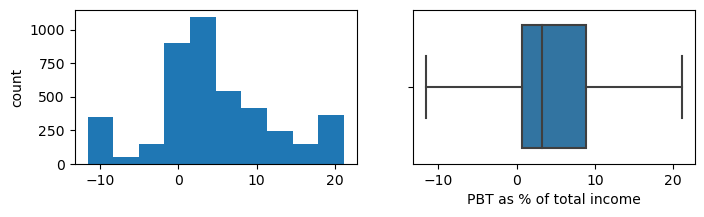

PAT as % of total income
Skew : 0.14


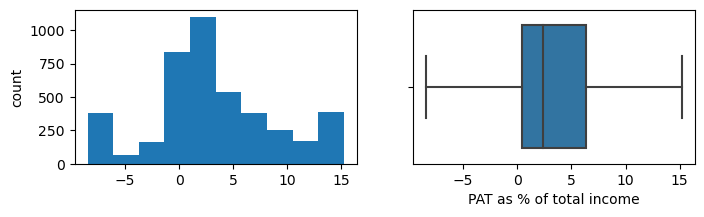

Cash profit as % of total income
Skew : 0.15


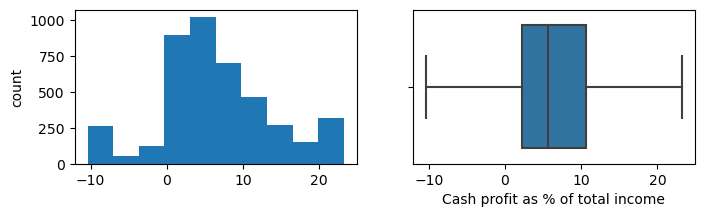

PAT as % of net worth
Skew : 0.01


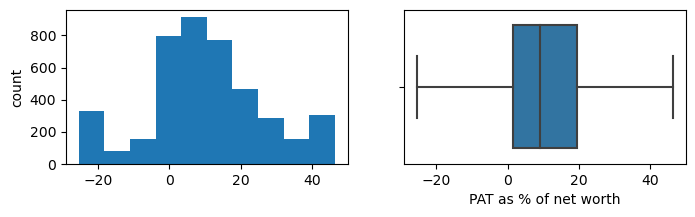

Sales
Skew : 1.2


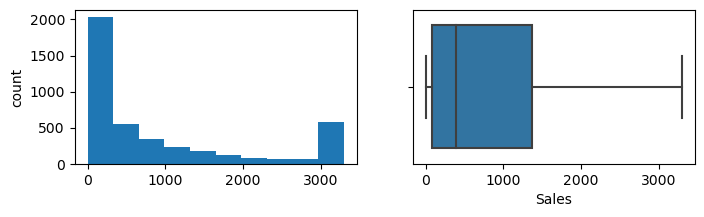

Income from fincial services
Skew : 1.22


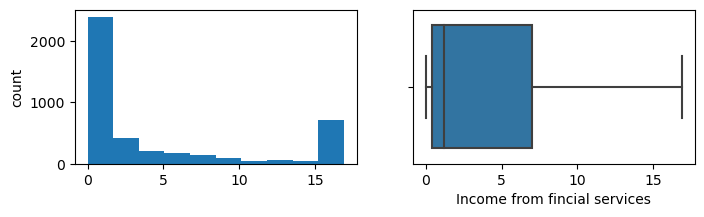

Other income
Skew : 1.21


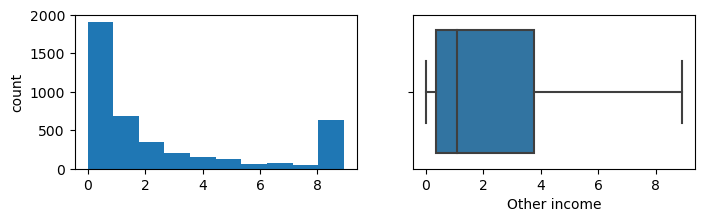

Total capital
Skew : 1.15


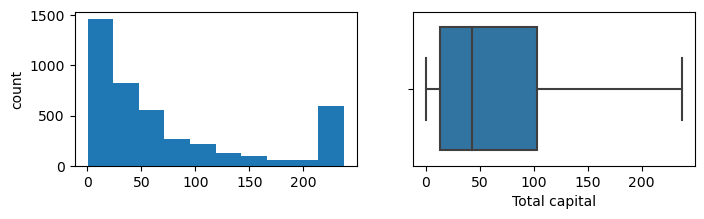

Reserves and funds
Skew : 1.01


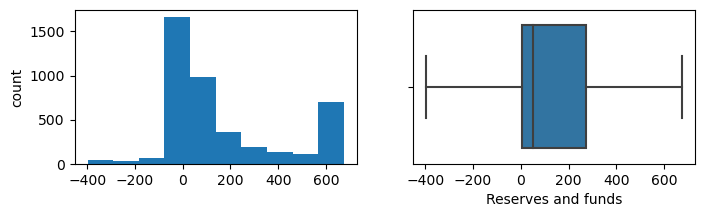

Borrowings
Skew : 1.19


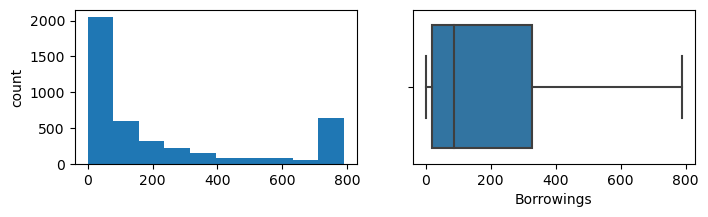

Current liabilities & provisions
Skew : 1.19


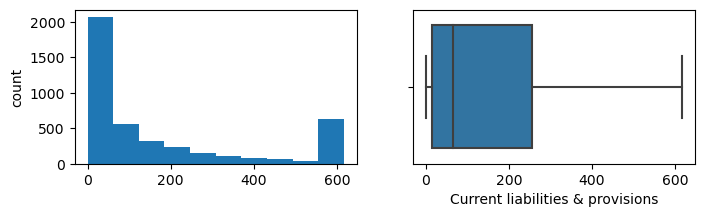

Deferred tax liability
Skew : 1.23


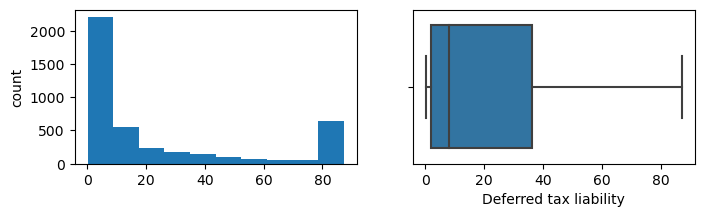

Shareholders funds
Skew : 1.2


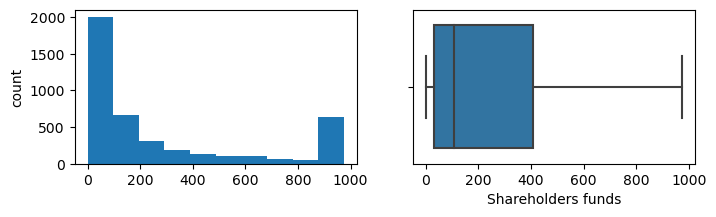

Cumulative retained profits
Skew : 0.83


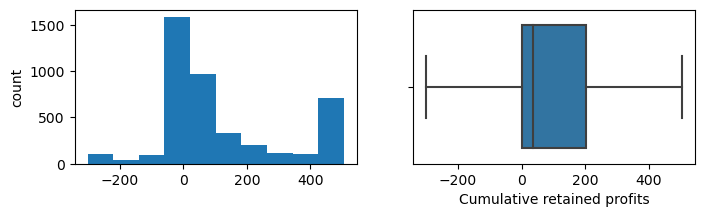

Capital employed
Skew : 1.2


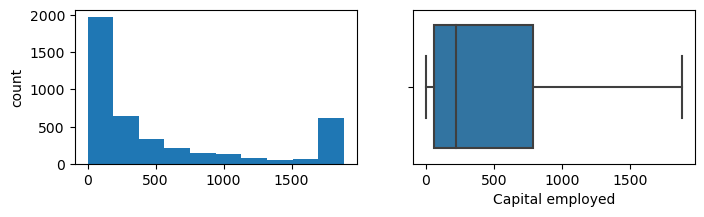

TOL/TNW
Skew : 1.08


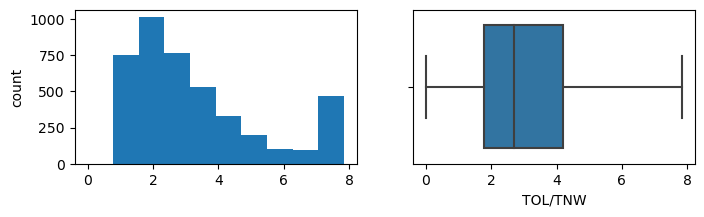

Total term liabilities / tangible net worth
Skew : 1.08


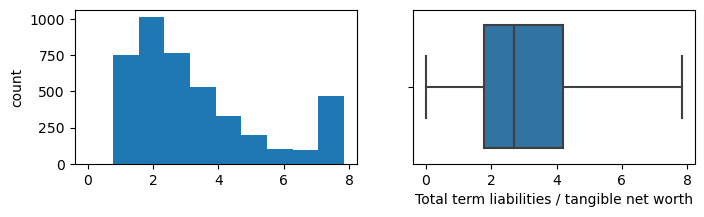

Contingent liabilities / Net worth (%)
Skew : 1.18


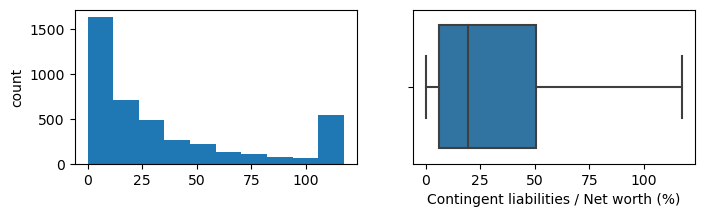

Contingent liabilities
Skew : 1.2


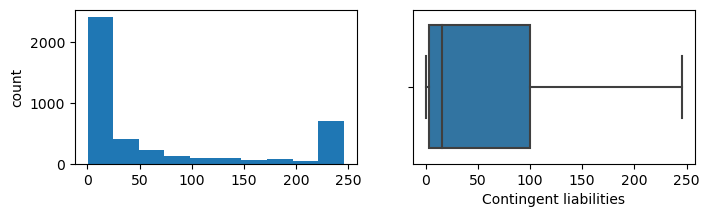

Net fixed assets
Skew : 1.19


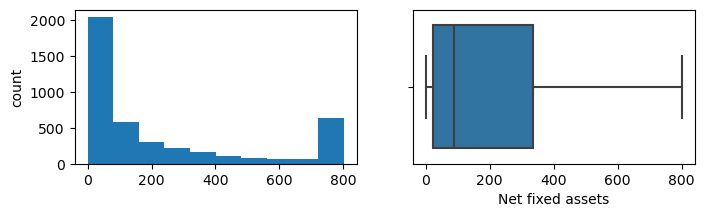

Investments
Skew : 1.14


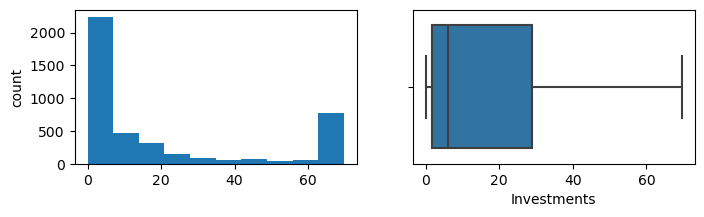

Current assets
Skew : 1.2


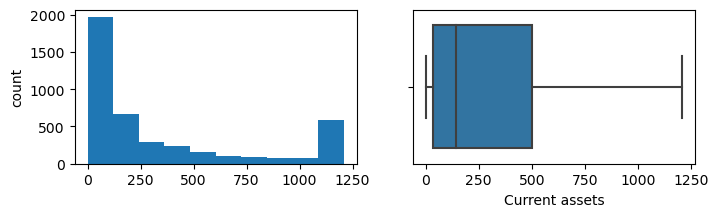

Net working capital
Skew : 0.47


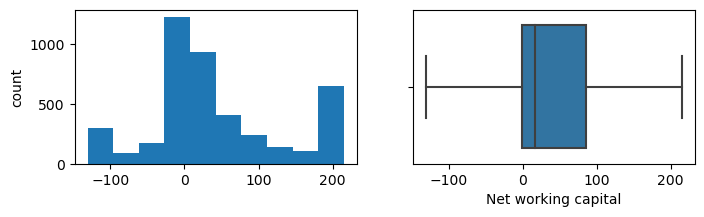

Quick ratio (times)
Skew : 0.97


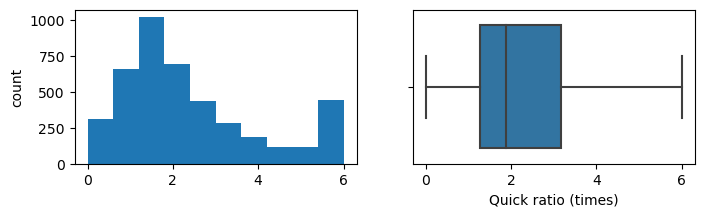

Current ratio (times)
Skew : 0.97


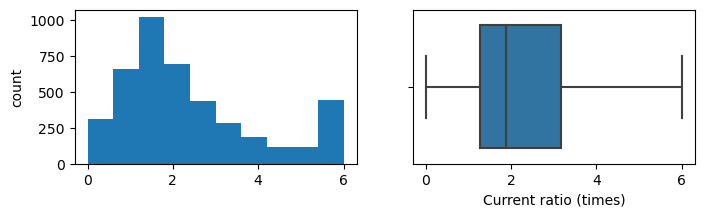

Debt to equity ratio (times)
Skew : 1.06


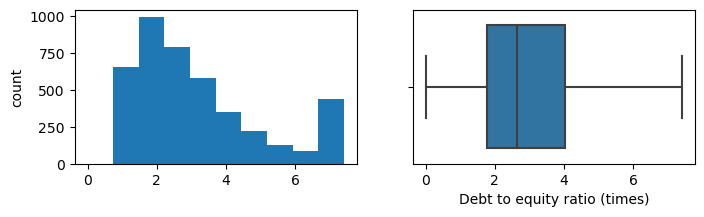

Cash to current liabilities (times)
Skew : 1.1


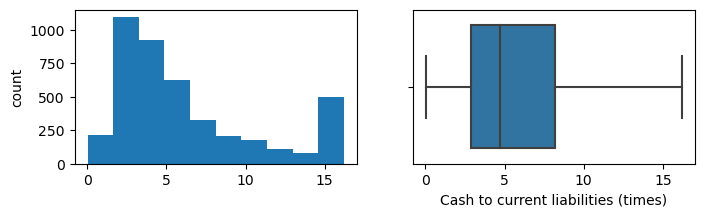

Cash to average cost of sales per day
Skew : 1.06


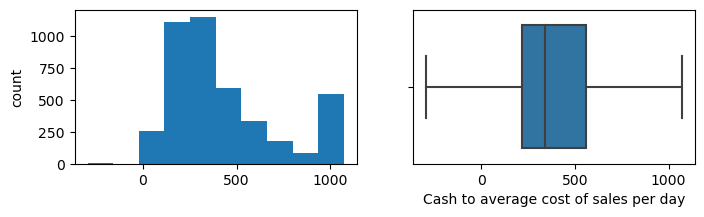

Creditors turnover
Skew : 1.01


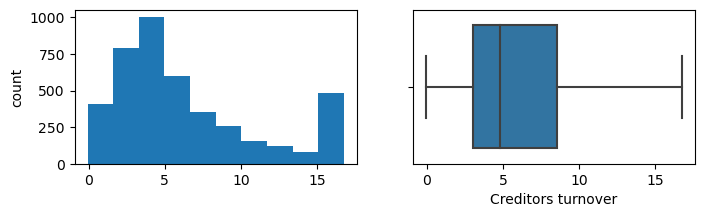

Debtors turnover
Skew : 0.85


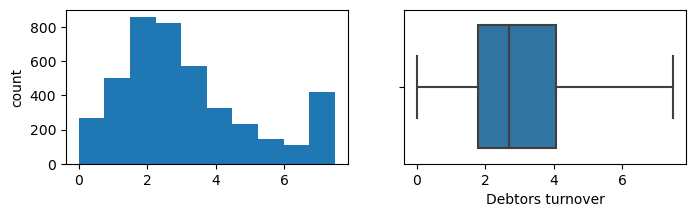

Finished goods turnover
Skew : 0.89


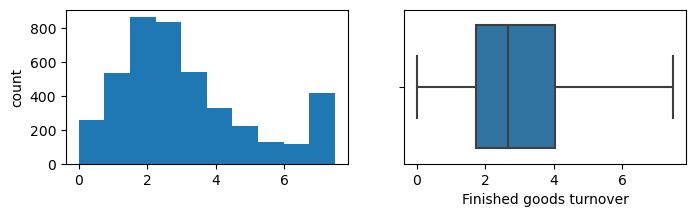

WIP turnover
Skew : 0.84


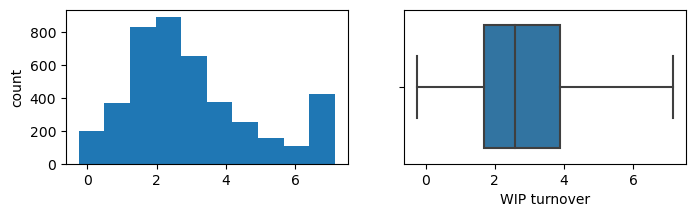

Raw material turnover
Skew : 0.84


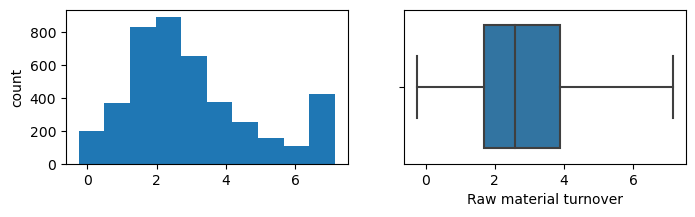

Shares outstanding
Skew : 1.05


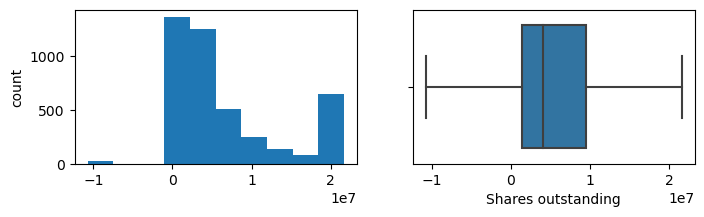

Equity face value
Skew : 0


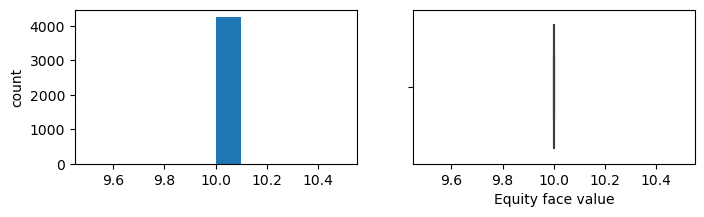

EPS
Skew : 0.85


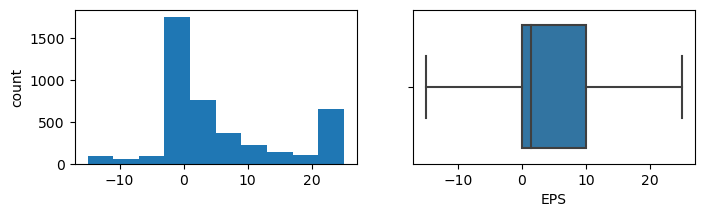

Adjusted EPS
Skew : 0.77


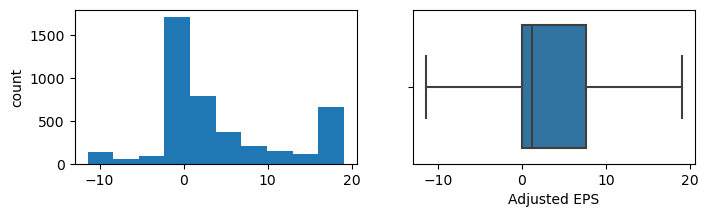

Total liabilities
Skew : 1.18


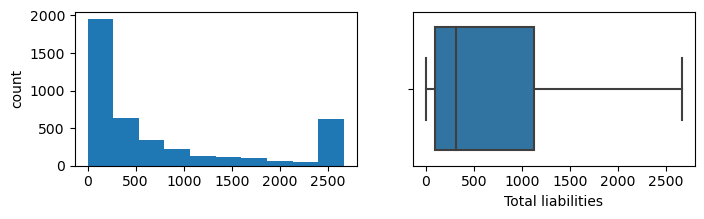

PE on BSE
Skew : 0.34


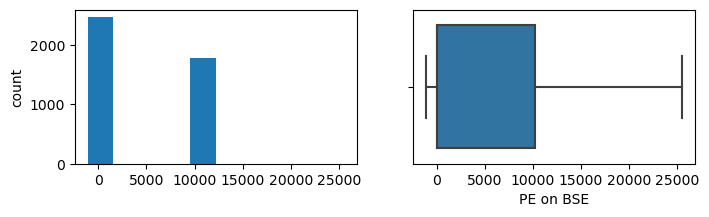

In [19]:

plt.rcParams['figure.figsize'] = [3, 2]
for col in X.columns:
    print(col)
    print('Skew :',round(X[col].skew(),2))
    plt.figure(figsize=(8,2))
    plt.subplot(1,2,1)
    X[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=X[col])
    plt.show()

<Axes: title={'center': 'After removing Outliers'}>

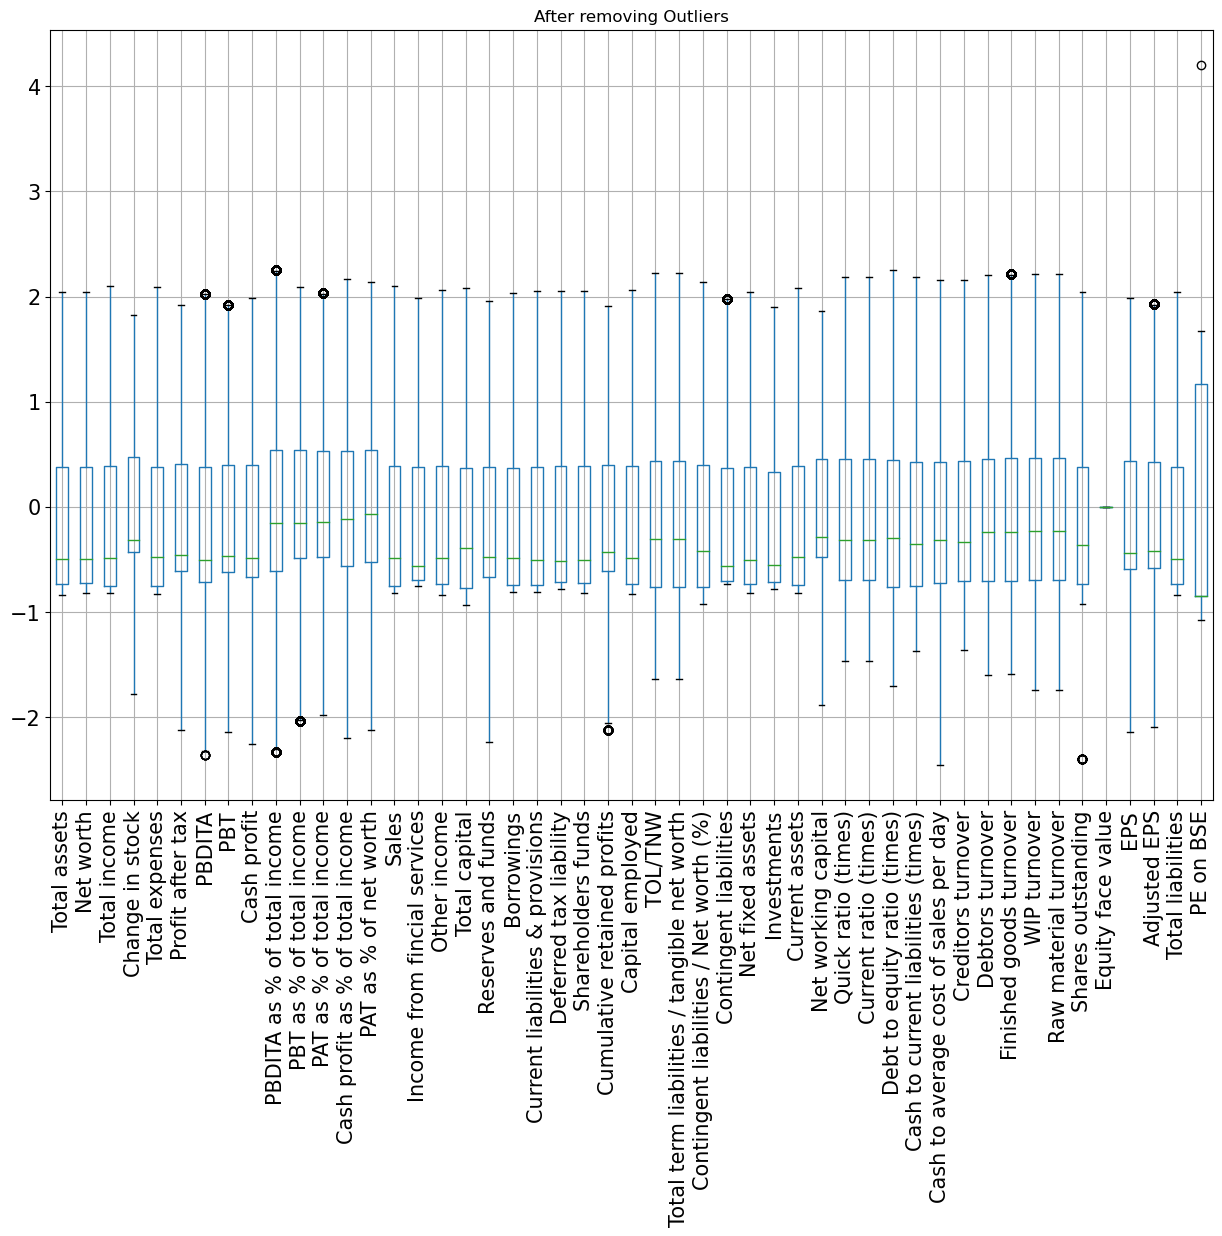

In [20]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert the result back to a DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Create the boxplot
plt.figure(figsize=(15, 10))
plt.title("After removing Outliers")
df_scaled.boxplot(rot=90, fontsize=15)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [22]:
X = X.copy()
f = calc_vif(X).sort_values(by = 'VIF', ascending = False)
f

C:\Users\abdul\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Total assets,inf
47,Total liabilities,inf
42,Raw material turnover,inf
41,WIP turnover,inf
34,Current ratio (times),inf
33,Quick ratio (times),inf
26,Total term liabilities / tangible net worth,inf
25,TOL/TNW,inf
2,Total income,295.51241
14,Sales,271.14647


In [23]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)


C:\Users\abdul\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Total assets,inf
47,Total liabilities,inf
42,Raw material turnover,inf
41,WIP turnover,inf
34,Current ratio (times),inf
33,Quick ratio (times),inf
26,Total term liabilities / tangible net worth,inf
25,TOL/TNW,inf
2,Total income,295.51241
14,Sales,271.14647


In [24]:
y.value_counts()

0    4022
1     234
Name: Networth Next Year, dtype: int64

In [25]:
X = X.rename(columns={
    'Net fixed assets': 'Net_fixed_assets',
    'Contingent liabilities': 'Contingent_liabilities',
    'Cash profit as % of total income': 'Cash_profit_as_percent_of_total_income',
    'Cash to average cost of sales per day': 'Cash_to_average_cost_of_sales_per_day',
    'Debtors turnover': 'Debtors_turnover',
    'Total term liabilities / tangible net worth': 'Total_term_liabilities_to_tangible_net_worth',
    'Borrowings': 'Borrowings',
    'Deferred tax liability': 'Deferred_tax_liability',
    'PAT as % of net worth': 'PAT_as_percent_of_net_worth',
    'Cumulative retained profits': 'Cumulative_retained_profits',
    'PE on BSE': 'PE_on_BSE',
    'Shares outstanding': 'Shares_outstanding',
    'Quick ratio (times)': 'Quick_ratio',
    'Contingent liabilities / Net worth (%)': 'Contingent_liabilities_to_net_worth_percent',
    'Income from fincial services': 'Income_from_financial_services',
    'Investments': 'Investments',
    'Other income': 'Other_income',
    'Adjusted EPS': 'Adjusted_EPS',
    'Net working capital': 'Net_working_capital',
    'Change in stock': 'Change_in_stock',

})

In [26]:
y.name = "Default"


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# Apply standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Combine scaled features with the target variable
df_train = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis=1)
df_test = pd.concat([X_test_scaled, y_test.reset_index(drop=True)], axis=1)



In [28]:
print('The number of rows (observations) in TRAIN set is',X_train_scaled.shape[0],'\n''The number of columns (variables) in TRAIN set is',X_train_scaled.shape[1])

The number of rows (observations) in TRAIN set is 2851 
The number of columns (variables) in TRAIN set is 49


In [29]:
print('The number of rows (observations) in TEST set is',X_test_scaled.shape[0],'\n''The number of columns (variables) in TEST set is',X_test_scaled.shape[1])

The number of rows (observations) in TEST set is 1405 
The number of columns (variables) in TEST set is 49


In [30]:
f_1 = 'Default ~ Net_fixed_assets + Contingent_liabilities + Cash_profit_as_percent_of_total_income + Cash_to_average_cost_of_sales_per_day + Debtors_turnover + Total_term_liabilities_to_tangible_net_worth + Borrowings + Deferred_tax_liability + PAT_as_percent_of_net_worth + Cumulative_retained_profits + PE_on_BSE + Shares_outstanding + Quick_ratio + Contingent_liabilities_to_net_worth_percent + Income_from_financial_services + Investments + Other_income + Adjusted_EPS + Net_working_capital + Change_in_stock'


In [31]:
import statsmodels.api as sm

model = sm.Logit.from_formula(f_1, data=df_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.121028
         Iterations 10


In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2830
Method:                           MLE   Df Model:                           20
Date:                Sun, 28 Jul 2024   Pseudo R-squ.:                  0.4375
Time:                        18:26:48   Log-Likelihood:                -345.05
converged:                       True   LL-Null:                       -613.44
Covariance Type:            nonrobust   LLR p-value:                5.692e-101
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -4.9536      0.294    -16.850      0.000      -5.530      -4.377
Net_fixed_assets                                -0.5386      0.341     -1.581      0.114      -1.206       0.129
Contingent_liabilities                          -0.5131      0.214     -2.400      0.016      -0.932      -0.094
Cash_profit_as_percent_of_total_income          -0.3214      0.131     -2.455      0.014      -0.578      -0.065
Cash_to_average_cost_of_sales_per_day            0.2662      0.098      2.720      0.007       0.074       0.458
Debtors_turnover                                 0.3117      0.101      3.102      0.002       0.115       0.509
Total_term_liabilities_to_tangible_net_worth     0.6742      0.103      6.522      0.000       0.472       0.877
Borrowings                                      -0.0417      0.323     -0.129      0.897      -0.675       0.591
Deferred_tax_liability                           0.0387      0.290      0.133      0.894      -0.530       0.607
PAT_as_percent_of_net_worth                     -0.4723      0.120     -3.939      0.000      -0.707      -0.237
Cumulative_retained_profits                     -0.7421      0.292     -2.538      0.011      -1.315      -0.169
PE_on_BSE                                       -0.0824      0.110     -0.750      0.453      -0.298       0.133
Shares_outstanding                               0.0999      0.194      0.514      0.607      -0.281       0.481
Quick_ratio                                      0.0491      0.111      0.442      0.658      -0.169       0.267
Contingent_liabilities_to_net_worth_percent      0.3800      0.109      3.474      0.001       0.166       0.594
Income_from_financial_services                   0.4050      0.191      2.116      0.034       0.030       0.780
Investments                                      0.0736      0.171      0.429      0.668      -0.262       0.410
Other_income                                    -0.2366      0.183     -1.294      0.196      -0.595       0.122
Adjusted_EPS                                    -0.8041      0.212     -3.792      0.000      -1.220      -0.388
Net_working_capital                             -0.2376      0.192     -1.235      0.217      -0.614       0.139
Change_in_stock                                  0.2803      0.151      1.860      0.063      -0.015       0.576
================================================================================================================
"""

In [33]:

# Calculate pseudo R-squared
llf = result.llf  # Log-likelihood of the fitted model
llnull = result.llnull  # Log-likelihood of the null model
df_model = result.df_model  # Number of predictors

# pseudo R-squared
pseudo_r2 = 1 - (llf / llnull)
print('pseudo R-squared:', pseudo_r2)

pseudo R-squared: 0.43751108611789713


In [34]:
# Updated formula with insignificant variables removed
f_2 = 'Default ~ Contingent_liabilities + Cash_profit_as_percent_of_total_income + Debtors_turnover + Total_term_liabilities_to_tangible_net_worth + PAT_as_percent_of_net_worth + Contingent_liabilities_to_net_worth_percent + Income_from_financial_services + Investments + Adjusted_EPS'


In [35]:
model2 = sm.Logit.from_formula(f_2, data=df_train)
result2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.126687
         Iterations 9


In [36]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2841
Method:                           MLE   Df Model:                            9
Date:                Sun, 28 Jul 2024   Pseudo R-squ.:                  0.4112
Time:                        18:26:48   Log-Likelihood:                -361.18
converged:                       True   LL-Null:                       -613.44
Covariance Type:            nonrobust   LLR p-value:                6.221e-103
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -4.3745      0.192    -22.781      0.000      -4.751      -3.998
Contingent_liabilities                          -0.6817      0.170     -4.010      0.000      -1.015      -0.348
Cash_profit_as_percent_of_total_income          -0.3845      0.142     -2.698      0.007      -0.664      -0.105
Debtors_turnover                                 0.2005      0.089      2.250      0.024       0.026       0.375
Total_term_liabilities_to_tangible_net_worth     0.6759      0.094      7.158      0.000       0.491       0.861
PAT_as_percent_of_net_worth                     -0.5755      0.121     -4.759      0.000      -0.812      -0.338
Contingent_liabilities_to_net_worth_percent      0.4985      0.101      4.916      0.000       0.300       0.697
Income_from_financial_services                   0.1485      0.168      0.884      0.377      -0.181       0.478
Investments                                      0.0675      0.155      0.437      0.662      -0.235       0.370
Adjusted_EPS                                    -0.7210      0.179     -4.028      0.000      -1.072      -0.370
================================================================================================================
"""

In [37]:

# Calculate pseudo R-squared
llf = result2.llf  # Log-likelihood of the fitted model
llnull = result2.llnull  # Log-likelihood of the null model
df_model = result2.df_model  # Number of predictors

# pseudo R-squared
pseudo_r2 = 1 - (llf / llnull)
print('pseudo R-squared:', pseudo_r2)

pseudo R-squared: 0.41121509200526085


In [38]:
y_prob_pred_train = result2.predict(df_train)
y_prob_pred_train

0      0.00957
1      0.03524
2      0.01807
3      0.01125
4      0.03542
         ...  
2846   0.02757
2847   0.02073
2848   0.02403
2849   0.00755
2850   0.00953
Length: 2851, dtype: float64

In [39]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

              precision    recall  f1-score   support

           0      0.965     0.986     0.975      2692
           1      0.618     0.396     0.483       159

    accuracy                          0.953      2851
   macro avg      0.791     0.691     0.729      2851
weighted avg      0.946     0.953     0.948      2851

Accuracy: 0.953
F1 Score: 0.483


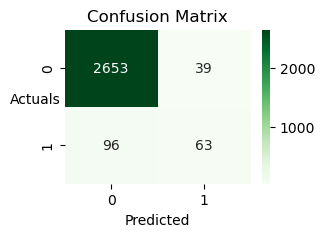

In [40]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score,f1_score,auc

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greens');
print(classification_report(df_train['Default'],y_class_pred,digits=3))
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix')
print(f"Accuracy: {accuracy_score(df_train['Default'],y_class_pred):.3f}")


# Calculate F1 score
f1 = f1_score(df_train['Default'],y_class_pred, average='binary')
print(f"F1 Score: {f1:.3f}")

In [41]:
y_prob_pred_test = result2.predict(df_test)
y_prob_pred_test

0      0.00297
1      0.05192
2      0.00273
3      0.01586
4      0.00974
         ...  
1400   0.00046
1401   0.05202
1402   0.02752
1403   0.05792
1404   0.52561
Length: 1405, dtype: float64

              precision    recall  f1-score   support

           0      0.957     0.989     0.973      1330
           1      0.533     0.213     0.305        75

    accuracy                          0.948      1405
   macro avg      0.745     0.601     0.639      1405
weighted avg      0.934     0.948     0.937      1405

Accuracy: 0.948
F1 Score: 0.305


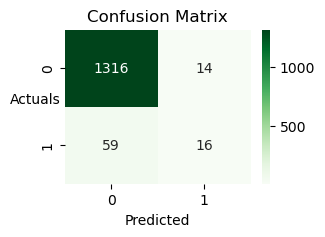

In [42]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)
    
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greens');
print(classification_report(df_test['Default'],y_class_pred,digits=3))
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix')
print(f"Accuracy: {accuracy_score(df_test['Default'],y_class_pred):.3f}")


# Calculate F1 score
f1 = f1_score(df_test['Default'],y_class_pred, average='binary')
print(f"F1 Score: {f1:.3f}")

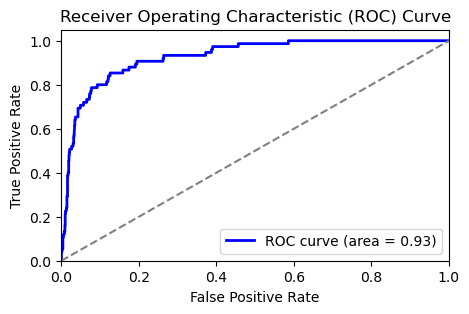

In [43]:

import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(df_test['Default'], y_prob_pred_test)

# Compute AUC
roc_auc = roc_auc_score(df_test['Default'], y_prob_pred_test)


# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


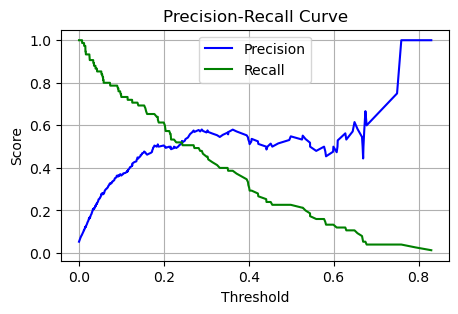

In [44]:
from sklearn.metrics import precision_recall_curve
# Calculate precision-recall pairs for different thresholds
precisions, recalls, thresholds = precision_recall_curve(df_test['Default'], y_prob_pred_test)

# Plot precision-recall curve
plt.figure(figsize=(5, 3))
plt.plot(thresholds, precisions[:-1], 'b-', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

           0      0.977     0.966     0.972      1330
           1      0.500     0.600     0.545        75

    accuracy                          0.947      1405
   macro avg      0.739     0.783     0.759      1405
weighted avg      0.952     0.947     0.949      1405

Accuracy: 0.947
F1 Score: 0.545


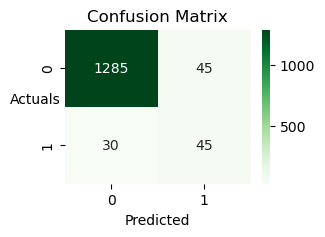

In [45]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.2:
        a=1
    else:
        a=0
    y_class_pred.append(a)
    
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greens');
print(classification_report(df_test['Default'],y_class_pred,digits=3))
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(f"Accuracy: {accuracy_score(df_test['Default'],y_class_pred):.3f}")

plt.title('Confusion Matrix')
# Calculate F1 score
f1 = f1_score(df_test['Default'],y_class_pred, average='binary')
print(f"F1 Score: {f1:.3f}")

In [46]:
# Define the subset of significant columns to keep
significant_columns = [ 'Net_fixed_assets', 'Contingent_liabilities', 'Cash_profit_as_percent_of_total_income', 'Cash_to_average_cost_of_sales_per_day', 'Debtors_turnover', 'Total_term_liabilities_to_tangible_net_worth', 'Borrowings', 'Deferred_tax_liability', 'PAT_as_percent_of_net_worth', 'Cumulative_retained_profits', 'PE_on_BSE', 'Shares_outstanding', 'Quick_ratio', 'Contingent_liabilities_to_net_worth_percent', 'Income_from_financial_services', 'Investments', 'Other_income', 'Adjusted_EPS', 'Net_working_capital', 'Change_in_stock'
]

# Filter the scaled DataFrames to keep only the significant columns
X_train_scaled = X_train_scaled[significant_columns]
X_test_scaled = X_test_scaled[significant_columns]

              precision    recall  f1-score   support

           0      0.959     0.989     0.974      1330
           1      0.576     0.253     0.352        75

    accuracy                          0.950      1405
   macro avg      0.767     0.621     0.663      1405
weighted avg      0.939     0.950     0.941      1405

Accuracy: 0.9501779359430605
F1 Score: 0.352


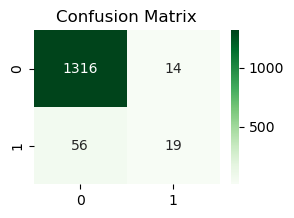

In [47]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
sns.heatmap((metrics.confusion_matrix(y_test, y_pred)),annot=True,fmt='.5g',cmap='Greens');
print(classification_report(y_test, y_pred,digits=3))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

plt.title('Confusion Matrix')
# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score: {f1:.3f}")

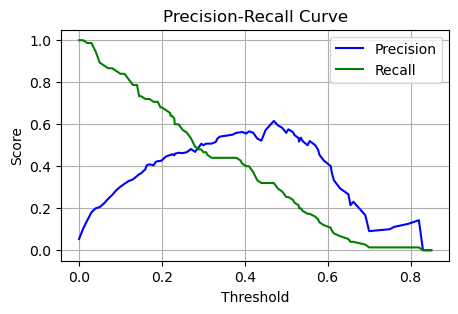

In [48]:
from sklearn.metrics import precision_recall_curve
# Predict probabilities on the test set
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate precision-recall pairs for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(5, 3))
plt.plot(thresholds, precisions[:-1], 'b-', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

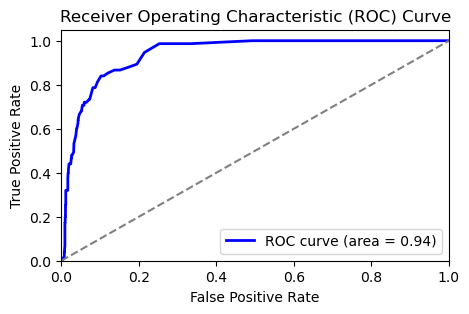

In [50]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

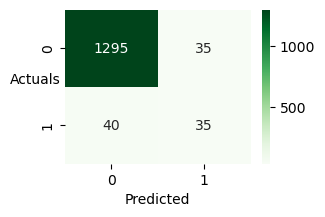

              precision    recall  f1-score   support

           0      0.970     0.974     0.972      1330
           1      0.500     0.467     0.483        75

    accuracy                          0.947      1405
   macro avg      0.735     0.720     0.727      1405
weighted avg      0.945     0.947     0.946      1405

Accuracy: 0.947
F1 Score: 0.483


In [51]:
# Predict probabilities on the test set
y_prob =  model.predict_proba(X_test_scaled)[:, 1]

# Apply the threshold to get binary predictions
threshold = 0.3
y_pred = (y_prob >= threshold).astype(int)

# Evaluate the model
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='.5g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.show()

print(classification_report(y_test, y_pred, digits=3))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score: {f1:.3f}")

In [52]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

No of training samples after Smote: 2851
              precision    recall  f1-score   support

           0      0.971     0.971     0.971      1330
           1      0.480     0.480     0.480        75

    accuracy                          0.944      1405
   macro avg      0.725     0.725     0.725      1405
weighted avg      0.944     0.944     0.944      1405

Accuracy: 0.944
F1 Score: 0.480


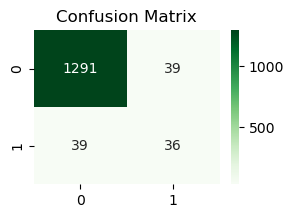

In [53]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train_scaled, y_train)
print("No of training samples after Smote:",len(X_train_scaled))
# Predict on the test set
y_pred = pipeline.predict(X_test_scaled)

# Evaluate the model
sns.heatmap((metrics.confusion_matrix(y_test, y_pred)),annot=True,fmt='.5g',cmap='Greens');
print(classification_report(y_test, y_pred, digits=3))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

plt.title('Confusion Matrix')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score: {f1:.3f}")

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:

param_grid = {
    'smote__sampling_strategy': [ 1.0, 'minority'],
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_leaf': [1, 4,10]
}

# Create pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Train the model with GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best model from GridSearchCV
best_pipeline = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 100, 'smote__sampling_strategy': 1.0}


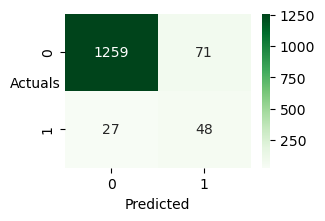

              precision    recall  f1-score   support

           0      0.979     0.947     0.963      1330
           1      0.403     0.640     0.495        75

    accuracy                          0.930      1405
   macro avg      0.691     0.793     0.729      1405
weighted avg      0.948     0.930     0.938      1405

Accuracy: 0.930
F1 Score: 0.495


In [56]:
# Predict probabilities on the test set using the best model
y_prob = best_pipeline.predict_proba(X_test_scaled)[:, 1]

# Apply the threshold to get binary predictions
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

# Evaluate the model
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='.5g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.show()

print(classification_report(y_test, y_pred, digits=3))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score: {f1:.3f}")

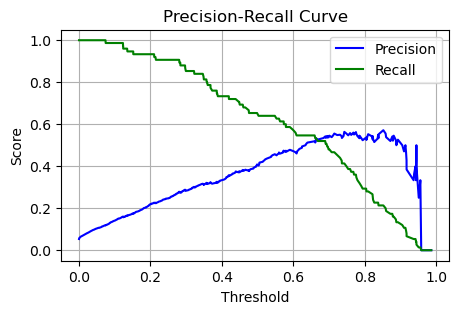

In [57]:
from sklearn.metrics import precision_recall_curve
# Predict probabilities on the test set
y_pred_prob = best_pipeline.predict_proba(X_test_scaled)[:, 1]

# Calculate precision-recall pairs for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(5, 3))
plt.plot(thresholds, precisions[:-1], 'b-', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

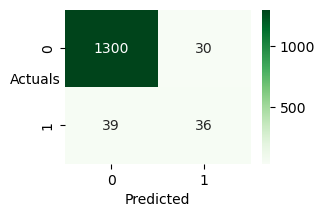

              precision    recall  f1-score   support

           0      0.971     0.977     0.974      1330
           1      0.545     0.480     0.511        75

    accuracy                          0.951      1405
   macro avg      0.758     0.729     0.742      1405
weighted avg      0.948     0.951     0.949      1405

Accuracy: 0.951
F1 Score: 0.511


In [58]:
# Predict probabilities on the test set using the best model
y_proB = best_pipeline.predict_proba(X_test_scaled)[:, 1]

# Apply the threshold to get binary predictions
threshold = 0.7
y_pred = (y_prob >= threshold).astype(int)

# Evaluate the model
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='.5g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.show()

print(classification_report(y_test, y_pred, digits=3))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score: {f1:.3f}")

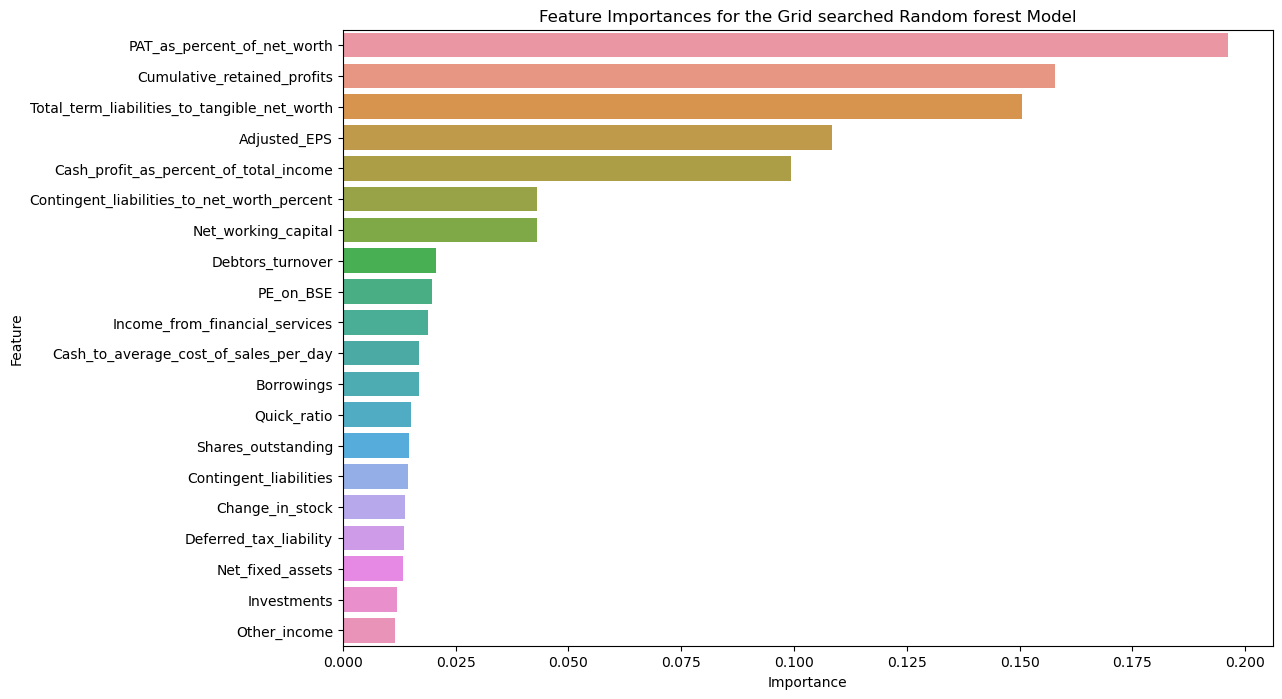

In [59]:
# Get the feature importances from the best model
feature_importances = best_pipeline.named_steps['classifier'].feature_importances_

# Get the feature names
feature_names = X_train_scaled.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances for the Grid searched Random forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
